In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [2]:
from tensorflow.keras.datasets import mnist

# Load data

In [3]:
(X_train, y_train),(X_test, y_test)= mnist.load_data()

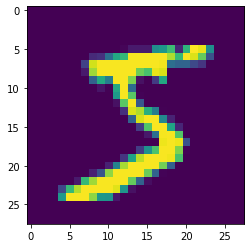

In [4]:
plt.imshow(X_train[0])

# Standartize data

In [5]:
X_train = X_train/255
X_test = X_test/255

# Shape of images

In [7]:
X_train[0].shape

(28, 28)

# AutoEncoder

In [9]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400, activation="relu"))
encoder.add(Dense(200, activation="relu"))
encoder.add(Dense(100, activation="relu"))
encoder.add(Dense(50, activation="relu"))
encoder.add(Dense(25, activation="relu"))

In [10]:
dencoder = Sequential()
dencoder.add(Dense(50,input_shape=[25], activation="relu"))
dencoder.add(Dense(100, activation="relu"))
dencoder.add(Dense(200, activation="relu"))
dencoder.add(Dense(400, activation="relu"))
dencoder.add(Dense(784, activation="sigmoid"))
dencoder.add(Reshape([28,28]))

In [11]:
autencoder = Sequential([encoder,dencoder])

In [12]:
autencoder.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=1.5),
                  metrics=['accuracy'])

In [13]:
autencoder.fit(X_train,X_train, epochs= 5,
              validation_data=[X_test,X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.2560 - accuracy: 0.7922 - val_loss: 0.2301 - val_accuracy: 0.7858
Epoch 2/5
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.2037 - accuracy: 0.7957 - val_loss: 0.1753 - val_accuracy: 0.7959
Epoch 3/5
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.1636 - accuracy: 0.8014 - val_loss: 0.1544 - val_accuracy: 0.8003
Epoch 4/5
60000/60000 [==============================] - 84s 1ms/sample - loss: 0.1491 - accuracy: 0.8041 - val_loss: 0.1432 - val_accuracy: 0.8027
Epoch 5/5
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.1423 - accuracy: 0.8054 - val_loss: 0.1391 - val_accuracy: 0.8074


In [14]:
passed_images = autencoder.predict(X_test[:10])

# Results Example

Original Image


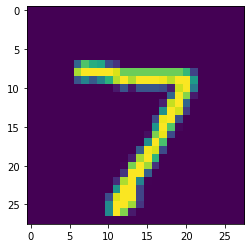

Reconstructed Image


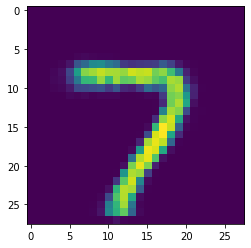

In [16]:
n=0
print('Original Image')
plt.imshow(X_test[n]);
plt.show()
print('Reconstructed Image')
plt.imshow(passed_images[n]);